In [1]:
from driver_comparisons import  main, plot_driver_speed_change, get_driver_lap_comparison, fastest_lap_comparison, driver_gear_changes


In [2]:
session_bahrain = main(2022, "Bahrain", "R")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


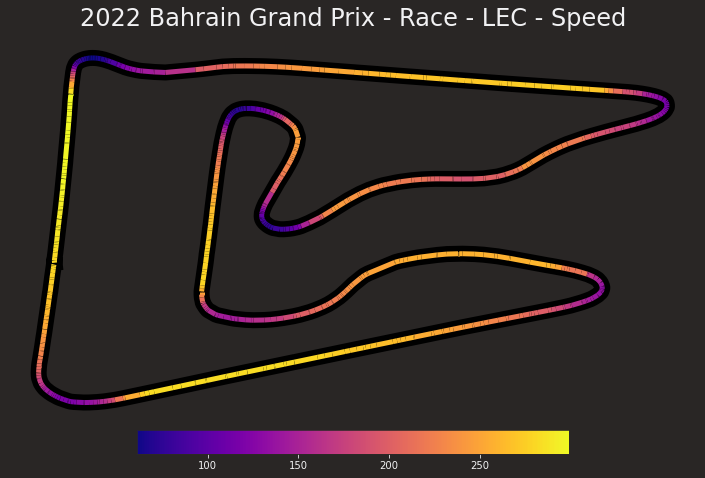

In [3]:
plot_driver_speed_change("LEC", session_bahrain)

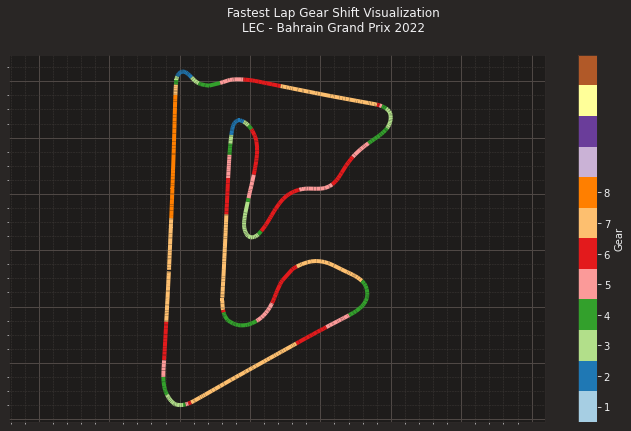

In [4]:
driver_gear_changes("LEC",session_bahrain)

In [5]:
session_monaco = main(2022, "Monaco", "R")

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']


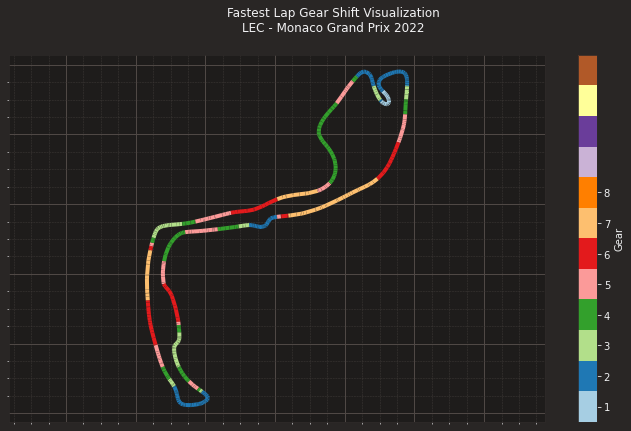

In [6]:
driver_gear_changes("LEC",session_monaco)

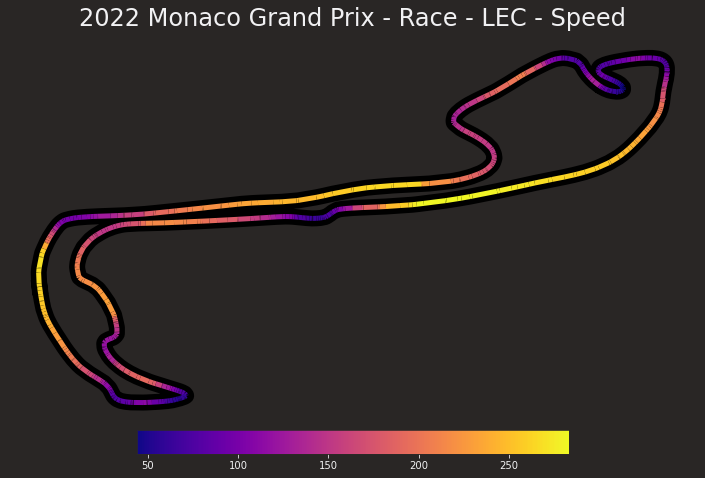

In [7]:
plot_driver_speed_change("LEC", session_monaco)

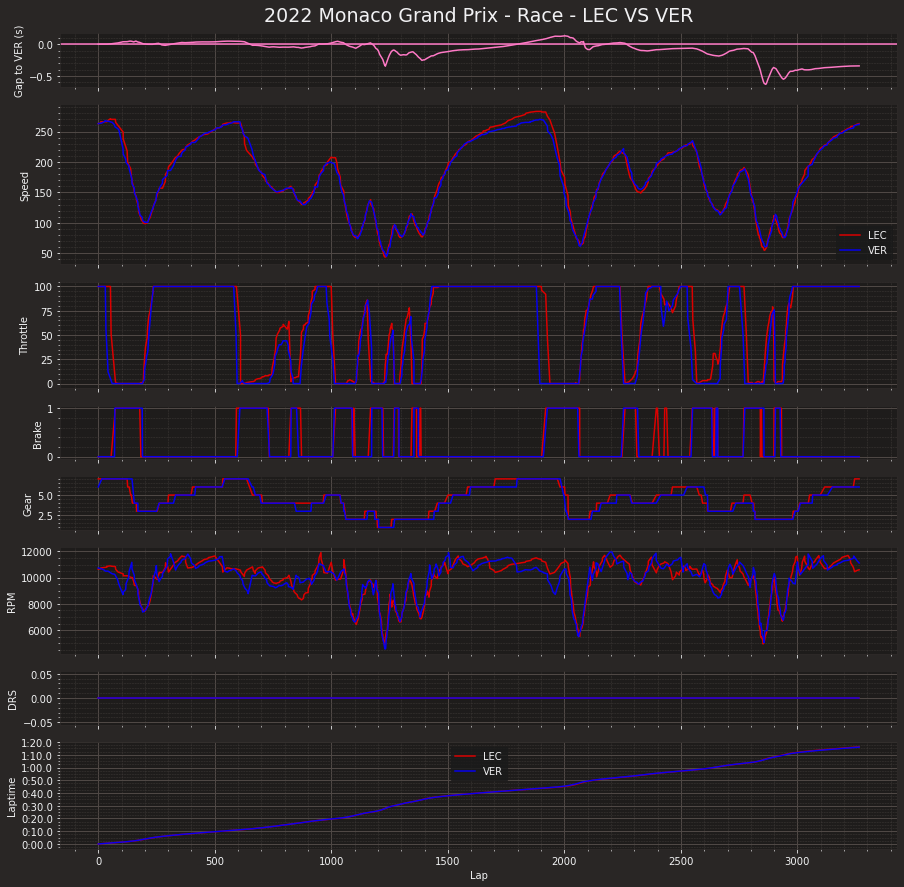

In [8]:
get_driver_lap_comparison("LEC","VER",session_monaco)

In [9]:
spanish_session = main(2022, "Spanish", "R")

core           INFO 	Loading data for Spanish Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '63', '55', '44', '77', '31', '4', '14', '22', '5', '3', '10', '47', '18', '6', '20', '23', '24', '16']


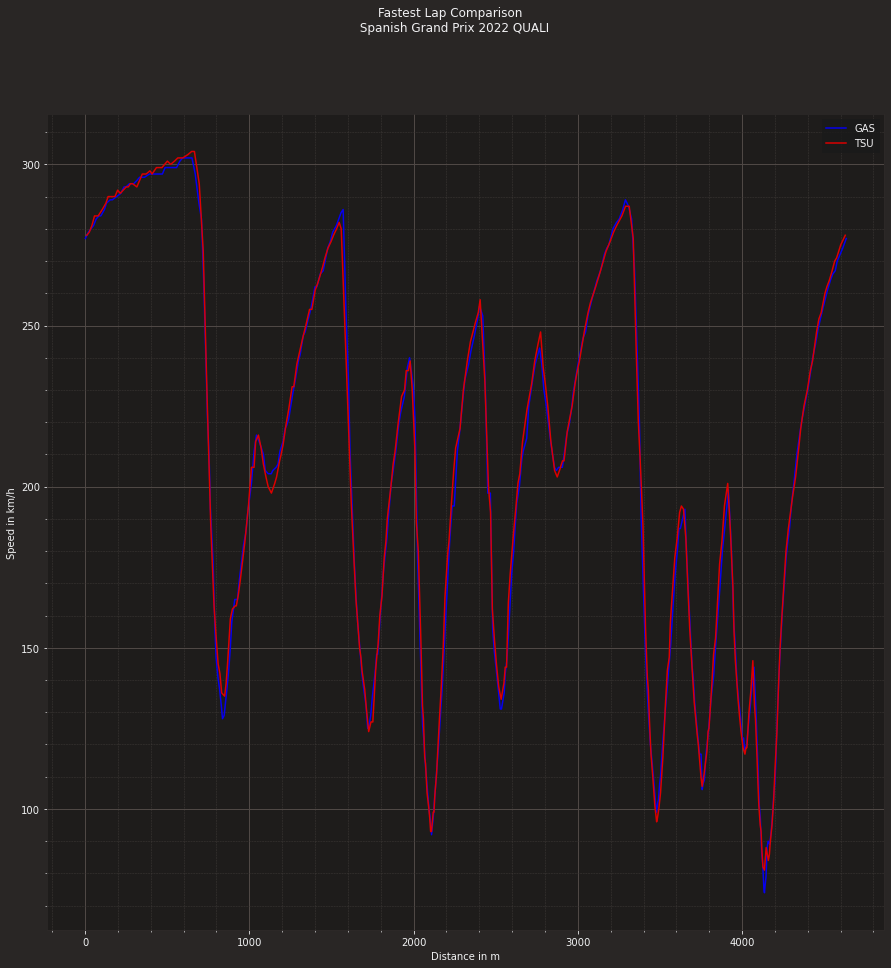

In [10]:
fastest_lap_comparison("GAS","TSU",spanish_session)

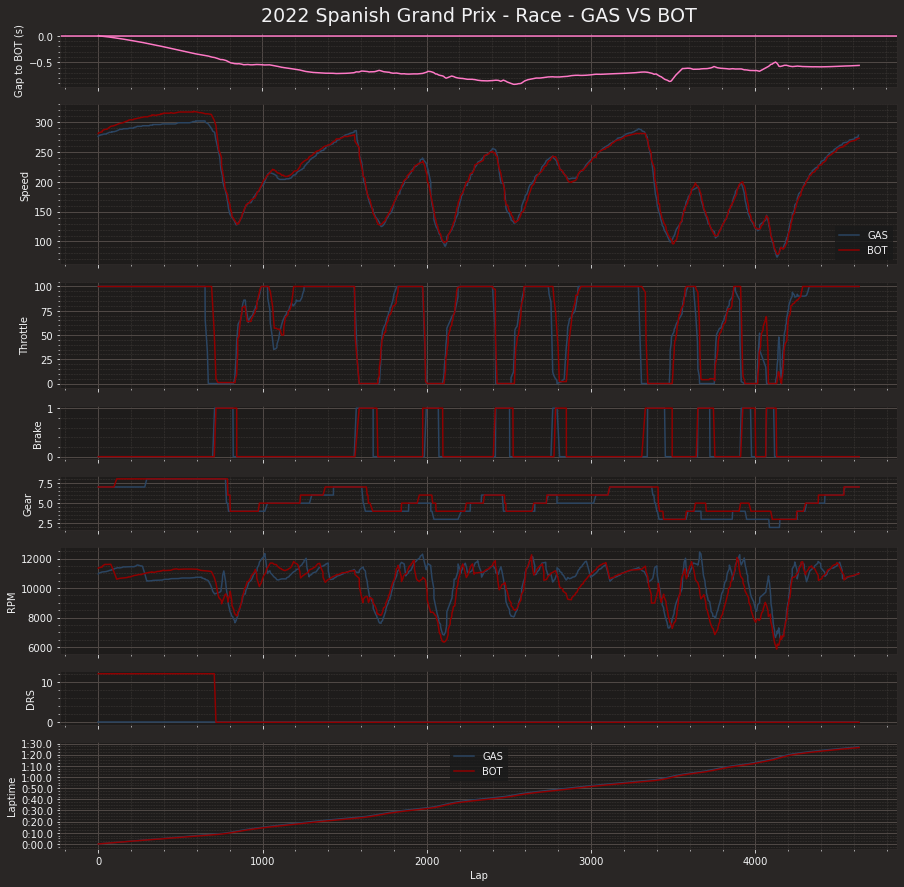

In [11]:
get_driver_lap_comparison("GAS",'BOT', spanish_session)

In [12]:
from F1_aws_plot import get_driver_aws_data

In [13]:
'''import numpy as np
import pandas as pd

import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


def main(year, grand_prix, session):
    # This calls on the fastf1 api and creates a session based on year,
    # grand prix, and session(Quali, race, sprint) wanted
    # Setup plotting
    plotting.setup_mpl()

    # Enable the cache
    ff1.Cache.enable_cache('/Users/cameronstevens/Documents/Coding/F1_2022_race_analytics/cache') 

    # Get rid of some pandas warnings that are not relevant for us at the moment
    pd.options.mode.chained_assignment = None 

    # we only want support for timedelta plotting in this example
    ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

    #This loads the session for the Grand prix session of interest

    session = ff1.get_session(year, grand_prix, session)
    
    session.load() 

    return(session)


def get_driver_aws_data(driver_1, driver_2, d_min, d_max, session):
    # Specify the drivers of interest, and we choose the corners,
   # or the distance we want to compare specifically. We pick the fastest lap from the
   # loaded telementry data

    # Extracting the laps for specified drivers
    laps_driver_1 = session.laps.pick_driver(driver_1)
    laps_driver_2 = session.laps.pick_driver(driver_2)
    #pick fastest lap and load telemetry
    telemetry_driver_1 = laps_driver_1.pick_fastest().get_car_data().add_distance()
    telemetry_driver_2 = laps_driver_2.pick_fastest().get_car_data().add_distance()

    # Identifying the team for coloring later on
    team_driver_1 = laps_driver_1.reset_index().loc[0, 'Team']
    team_driver_2 = laps_driver_2.reset_index().loc[0, 'Team']

    #label all the rows of telemtry data according to the following rules:
    #Brake > 0 → ‘Brake’
    #Throttle == 100 → ‘Full Throttle’
    #Brake == 0 & Throttle < 100 → ‘Cornering’
    # Assigning labels to what the drivers are currently doing 
    telemetry_driver_1.loc[telemetry_driver_1['Brake'] > 0, 'CurrentAction'] = 'Brake'
    telemetry_driver_1.loc[telemetry_driver_1['Throttle'] == 100, 'CurrentAction'] = 'Full Throttle'
    telemetry_driver_1.loc[(telemetry_driver_1['Brake'] == 0) & (telemetry_driver_1['Throttle'] < 100), 'CurrentAction'] = 'Cornering'

    telemetry_driver_2.loc[telemetry_driver_2['Brake'] > 0, 'CurrentAction'] = 'Brake'
    telemetry_driver_2.loc[telemetry_driver_2['Throttle'] == 100, 'CurrentAction'] = 'Full Throttle'
    telemetry_driver_2.loc[(telemetry_driver_2['Brake'] == 0) & (telemetry_driver_2['Throttle'] < 100), 'CurrentAction'] = 'Cornering'


    # Numbering each unique action to identify changes, so that we can group later on
    telemetry_driver_1['ActionID'] = (telemetry_driver_1['CurrentAction'] != telemetry_driver_1['CurrentAction'].shift(1)).cumsum()
    telemetry_driver_2['ActionID'] = (telemetry_driver_2['CurrentAction'] != telemetry_driver_2['CurrentAction'].shift(1)).cumsum()

    # Identifying all unique actions
    actions_driver_1 = telemetry_driver_1[['ActionID', 'CurrentAction', 'Distance']].groupby(['ActionID', 'CurrentAction']).max('Distance').reset_index()
    actions_driver_2 = telemetry_driver_2[['ActionID', 'CurrentAction', 'Distance']].groupby(['ActionID', 'CurrentAction']).max('Distance').reset_index()

    actions_driver_1['Driver'] = driver_1
    actions_driver_2['Driver'] = driver_2


    #we want to know the distance elapsed time per section
    #actions_driver_1 and actions_driver_2 display which distance the action took place
    # Calculating the distance between each action, so that we know how long the bar should be
    actions_driver_1['DistanceDelta'] = actions_driver_1['Distance'] - actions_driver_1['Distance'].shift(1)
    actions_driver_1.loc[0, 'DistanceDelta'] = actions_driver_1.loc[0, 'Distance']

    actions_driver_2['DistanceDelta'] = actions_driver_2['Distance'] - actions_driver_2['Distance'].shift(1)
    actions_driver_2.loc[0, 'DistanceDelta'] = actions_driver_2.loc[0, 'Distance']


    # Merging together
    all_actions = actions_driver_1.append(actions_driver_2)

    #WE ask ourselves what driver actually performed better through the corners
    #and the answer is by looking at drivers highest average speed through the corner.

    # Calculating average speed
    avg_speed_driver_1 = np.mean(telemetry_driver_1['Speed'].loc[
        (telemetry_driver_1['Distance'] >= d_min) & 
            (telemetry_driver_1['Distance'] >= d_max) 
    ])


    avg_speed_driver_2 = np.mean(telemetry_driver_2['Speed'].loc[
        (telemetry_driver_2['Distance'] >= d_min) & 
            (telemetry_driver_2['Distance'] >= d_max) 
    ])

    if avg_speed_driver_1 > avg_speed_driver_2:    
        speed_text = f"{driver_1} {round(avg_speed_driver_1 - avg_speed_driver_2,2)}km/h faster"
    else:
        speed_text = f"{driver_1} {round(avg_speed_driver_2 - avg_speed_driver_1,2)}km/h faster"

    ##############################
    #
    # Setting everything up
    #
    ##############################
    plt.rcParams["figure.figsize"] = [13, 4]
    plt.rcParams["figure.autolayout"] = True

    telemetry_colors = {
        'Full Throttle': 'green',
        'Cornering': 'grey',
        'Brake': 'red',
    }

    fig, ax = plt.subplots(2)


    ##############################
    #
    # Lineplot for speed 
    #
    ##############################
    ax[0].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
    ax[0].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))

    # Speed difference
    ax[0].text(d_min + 15,200, speed_text, fontsize = 15)

    ax[0].set(ylabel='Speed')
    ax[0].legend(loc="lower right")


    ##############################
    #
    # Horizontal barplot for telemetry
    #
    ##############################
    for driver in [driver_1, driver_2]:
        driver_actions = all_actions.loc[all_actions['Driver'] == driver]
        
        previous_action_end = 0
        for _, action in driver_actions.iterrows():
            ax[1].barh(
                [driver], 
                action['DistanceDelta'], 
                left=previous_action_end, 
                color=telemetry_colors[action['CurrentAction']]
            )
            
            previous_action_end = previous_action_end + action['DistanceDelta']
            
            
    ##############################
    #
    # Styling of the plot
    #
    ##############################   
    # Set x-label
    plt.xlabel('Distance')

    # Invert y-axis 
    plt.gca().invert_yaxis()

    # Remove frame from plot
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)

    # Add legend
    labels = list(telemetry_colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=telemetry_colors[label]) for label in labels]
    ax[1].legend(handles, labels)

    # Zoom in on the specific part we want to see
    ax[0].set_xlim(d_min, d_max)
    ax[1].set_xlim(d_min, d_max)'''


'import numpy as np\nimport pandas as pd\n\nimport fastf1 as ff1\nfrom fastf1 import plotting\n\nfrom matplotlib import pyplot as plt\nfrom matplotlib.pyplot import figure\n\n\ndef main(year, grand_prix, session):\n    # This calls on the fastf1 api and creates a session based on year,\n    # grand prix, and session(Quali, race, sprint) wanted\n    # Setup plotting\n    plotting.setup_mpl()\n\n    # Enable the cache\n    ff1.Cache.enable_cache(\'/Users/cameronstevens/Documents/Coding/F1_2022_race_analytics/cache\') \n\n    # Get rid of some pandas warnings that are not relevant for us at the moment\n    pd.options.mode.chained_assignment = None \n\n    # we only want support for timedelta plotting in this example\n    ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)\n\n    #This loads the session for the Grand prix session of interest\n\n    session = ff1.get_session(year, grand_prix, session)\n    \n    session.load() \n\n    return(session)\n

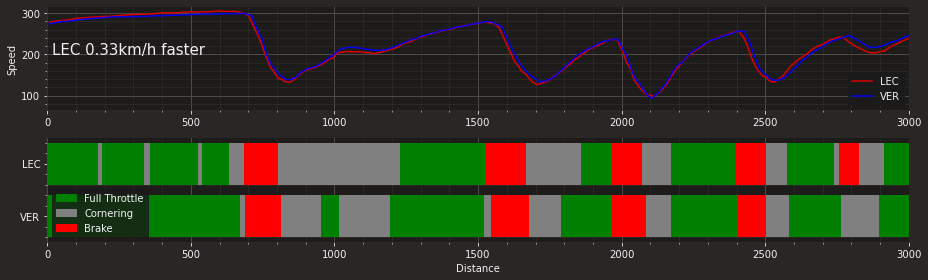

In [14]:
get_driver_aws_data("LEC","VER",0, 3000, spanish_session)